In [1]:
import pandas as pd
import numpy as np
import setup_jwlab
from jwlab.constants import cleaned_data_filepath
from jwlab.cluster_analysis_perm import cluster_analysis_procedure
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, RepeatedKFold
from scipy import stats
import more_itertools as mit
from sklearn.metrics import accuracy_score


In [2]:
# Argument 1: 9 or 11 (month olds)
# Argument 2: Boolean, True to randomize the labels, False otherwise
# Argument 3: averaging, could be: no_averaging, average_trials, average_trials_and_participants, permutation
# Argument 4: sliding_window_config[start_time, end_time, window_lengths[], step_length]
# Argument 5: cross_val_config[num_fold, num_iterations]

#cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [10, 20, 40, 60], 10], [3, 5])

loaded
mean: [[0.5, 0.48, 0.46, 0.51, 0.54, 0.47, 0.48, 0.48, 0.43, 0.5, 0.51, 0.52, 0.49, 0.49, 0.5, 0.45, 0.47, 0.45, 0.46, 0.51, 0.5, 0.49, 0.51, 0.52, 0.49, 0.51, 0.48, 0.5, 0.52, 0.5, 0.48, 0.52, 0.54, 0.52, 0.51, 0.52, 0.51, 0.53, 0.5, 0.52, 0.5, 0.51, 0.5, 0.5, 0.49, 0.48, 0.52, 0.51, 0.48, 0.48, 0.5, 0.5, 0.52, 0.51, 0.51, 0.52, 0.46, 0.48, 0.5, 0.51, 0.51, 0.5, 0.51, 0.47, 0.5, 0.5, 0.51, 0.5, 0.51, 0.55, 0.57, 0.53, 0.56, 0.53, 0.55, 0.53, 0.54, 0.53, 0.54, 0.5, 0.53, 0.52, 0.53, 0.53, 0.52, 0.51, 0.53, 0.55, 0.49, 0.5, 0.48, 0.51, 0.52, 0.51, 0.5, 0.51, 0.49, 0.55, 0.51, 0.52, 0.52, 0.49, 0.52, 0.5, 0.49, 0.52, 0.51, 0.5, 0.5, 0.51, 0.51, 0.48, 0.5, 0.49, 0.48, 0.48, 0.54, 0.53, 0.53, 0.5]]
stdev: [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01

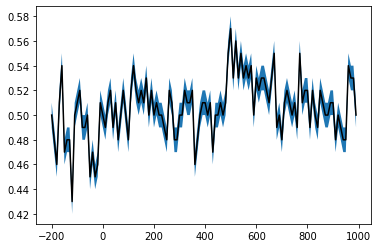

Valid windows are: [4, 23, 32, 33, 52, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 86, 87, 97, 116, 118]

Clusters are: [[69, 70, 71, 72, 73, 74, 75, 76, 77, 78], [80, 81, 82, 83]]

The max t mass is: 0.06110020549290011



0.06110020549290011

In [3]:
cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [10], 10], [3, 10])